<a href="https://colab.research.google.com/github/u3267496/UG-Online-Group-1/blob/main/(UG_Online_Group_1)Electricity_Software_Technology_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ST1 Assessment 3 Part A - Report (UG) (Electricity Price Prediction)**

Author: u3267496, u3260539, u3239193, u3267496, Assessment 3 Part A - Report (UG)
Programing: Electricity Price predection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/2024_S1_Teaching

[Errno 2] No such file or directory: '/content/drive/MyDrive/2024_S1_Teaching'
/content


In [ ]:
!ls

drive  sample_data


### Step 2: Reading the data Reading the data with python


In [ ]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading the dataset
import pandas as pd
import numpy as np
Electricity=pd.read_csv('/content/drive/MyDrive/Electricity.csv', encoding='latin')
print('Shape before deleting duplicate values:', Electricity.shape)

# Removing duplicate rows if any
Electricity=Electricity.drop_duplicates()
print('Shape After deleting duplicate values:', Electricity.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
Electricity.head(10)

Shape before deleting duplicate values: (992, 13)
Shape After deleting duplicate values: (992, 13)


,Week Of Year,Day,Month,Period Of Day,Forecast Wind Production,System Load EA,SMPEA,ORK Temperature,ORK Wind speed,CO2 Intensity,Actual Wind Production,System Load EP2,SMPEP2
0,44,1,11,0,315.31,3388.77,49.26,6,9.3,600.71,356,3159.60,54.32
1,44,1,11,1,321.80,3196.66,49.26,6,11.1,605.42,317,2973.01,54.23
2,44,1,11,2,328.57,3060.71,49.10,5,11.1,589.97,311,2834.00,54.23
3,44,1,11,3,335.60,2945.56,48.04,6,9.3,585.94,313,2725.99,53.47
4,44,1,11,4,342.90,2849.34,33.75,6,11.1,571.52,346,2655.64,39.87
5,44,1,11,5,342.97,2810.01,33.75,5,11.1,562.61,342,2585.99,39.87
6,44,1,11,6,343.18,2780.52,33.75,5,7.4,545.81,336,2561.70,39.87
7,44,1,11,7,343.46,2762.67,33.75,5,9.3,539.38,338,2544.33,39.87
8,44,1,11,8,343.88,2766.63,33.75,4,11.1,538.70,347,2549.02,39.87
9,44,1,11,9,344.39,2786.80,33.75,4,7.4,540.39,338,2547.15,39.87


## Key observations from Step 2 about Data Description


*   This file contains 992 entries related to electricity price predictions.
*   There are 13 attributes and they are outlined below.

*   Week Of Year - Week Of Year denotes a specific week in a calendar year, used to analyze seasonal variations in energy consumption and production, aiding stakeholders in forecasting and optimizing resource allocation.
*   Day - Day signifies a specific 24-hour period used to analyze fluctuations in energy demand and production. Examining daily data helps stakeholders identify trends and optimize energy distribution and management strategies.
*   Month - Month denotes a specific calendar month used to identify seasonal trends in energy production and consumption. Analyzing monthly data helps stakeholders optimize resource allocation and improve energy management strategies.
*   Period Of Day - Period Of Day refers to specific time segments within a 24-hour cycle, influencing energy consumption patterns. Analyzing this attribute helps stakeholders optimize resource management and improve efficiency in energy systems.
*   Forecast Wind Production - Forecast Wind Production predicts the expected energy output of wind turbines based on meteorological data and historical performance, aiding in energy management, resource allocation, and grid stability for efficient operations.
*   System Load EA - System Load EA refers to System Load Evaluation and Analysis, focusing on monitoring electrical load, forecasting future demands, assessing performance, and optimizing load distribution for improved efficiency and reliability.
*   SMPEA - SMPEA stands for Smart Multi-Purpose Electric Appliance, integrating advanced technologies for connectivity, automation, and energy efficiency, enabling multiple functions and providing users with improved control and convenience.
*   ORK Temperature - ORK Temperature refers to "Operational Reference Kit" or "Operational Reference Temperature," a standardized temperature used for testing, calibration, and operational assessments of equipment in energy, environmental monitoring, and industrial processes.
*   ORK Wind speed - ORK Wind Speed denotes "Operational Reference Wind Speed," a standardized measure used in wind energy studies to evaluate turbine performance, assess wind resources, and ensure compliance with industry standards.
*   CO2 Intensity - CO2 Intensity measures carbon dioxide emissions per energy unit produced, indicating environmental impact. It varies by energy mix and is used for regulatory targets and environmental performance reporting.
*   Actual Wind Production - Actual Wind Production measures the real-time energy generated by wind turbines, reflecting performance and efficiency. It helps evaluate wind farm effectiveness and informs operational decisions and energy management strategies.
*   System Load EP2 - "System Load EP2" indicates a standardized energy performance level 2 that systems must meet, focusing on energy efficiency standards, load management, operational performance, and serving as a benchmark for comparison.
*   SMPEP2 - SMPEP2 refers to Smart Multi-Purpose Electric Power Level 2, indicating advanced, multifunctional appliances or systems designed for remote control, automation, and improved energy efficiency in energy management.




# Step 3 : Problem Statement Definition
* Creating  a prediction model to wpredict the price( Actual Wind Production) of Electricity Price Prediction
* Target Variable: Actual Wind Production
Predictors/Features: Week Of Year, Period Of Da, Forecast Wind Production, System Load SMPEA, SMPEP2, CO2 Intensity, etc.

# Step 4: Looking at the class distribution (Target variable distribution to check if the data is balanced or skewed.
* If target variable's distribution is too skewed then the predictive modeling will lead to poor results.
* Ideally Bell curve is desirable but slightly positive skew or negative skew is also fine.
* When performing Regression algorithm modelling and analysis, we need to make sure the histogram looks like a bell curve or slight skewed version of it.
* Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios from the data.

<Axes: >

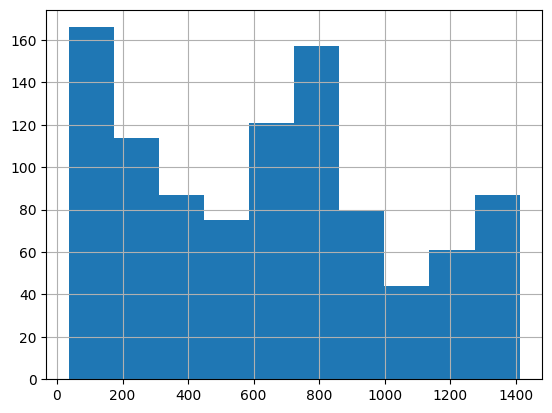

In [ ]:
%matplotlib inline
# Creating histogram as the Target variable is Continuous
# This will help us to understand the distribution of the MEDV values
Electricity['Actual Wind Production'].hist()

## Step 5: Basic Exploratory Data Analysis
* This step is performed to guage the overall data.
* The volume of data, the types of columns present in the data.
* Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

* This step helps to start the column/data rejection process.
* You must look at each column carefully and ask, does this column affect the values of the Target variable/Class?
* For example in this dataset, you will ask, does this column affect the price of the electricity?
* If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.

* There are four commands which are used for Basic data exploratory Analysis in Python

* head() : This helps to see a few sample rows of the data
* info() : This provides the summarized information of the data
* describe() : This provides the descriptive statistical details of the data
* nunique(): This helps us to identify if a column is categorical or continuous


In [ ]:
# Looking at sample rows in the data
Electricity.head()

,Week Of Year,Day,Month,Period Of Day,Forecast Wind Production,System Load EA,SMPEA,ORK Temperature,ORK Wind speed,CO2 Intensity,Actual Wind Production,System Load EP2,SMPEP2
0,44,1,11,0,315.31,3388.77,49.26,6,9.3,600.71,356,3159.60,54.32
1,44,1,11,1,321.80,3196.66,49.26,6,11.1,605.42,317,2973.01,54.23
2,44,1,11,2,328.57,3060.71,49.10,5,11.1,589.97,311,2834.00,54.23
3,44,1,11,3,335.60,2945.56,48.04,6,9.3,585.94,313,2725.99,53.47
4,44,1,11,4,342.90,2849.34,33.75,6,11.1,571.52,346,2655.64,39.87


In [ ]:
# Looking at sample rows in the data
Electricity.tail()

,Week Of Year,Day,Month,Period Of Day,Forecast Wind Production,System Load EA,SMPEA,ORK Temperature,ORK Wind speed,CO2 Intensity,Actual Wind Production,System Load EP2,SMPEP2
987,47,21,11,34,157.98,5772.00,98.09,7,35.2,504.78,172,5835.58,370.00
988,47,21,11,35,164.90,5964.00,286.97,6,33.3,497.26,187,5816.35,246.29
989,47,21,11,36,172.11,5868.80,98.26,6,29.6,500.23,191,5653.36,74.02
990,47,21,11,37,179.72,5661.73,70.63,6,24.1,497.35,200,5470.16,54.49
991,47,21,11,38,187.79,5533.23,65.61,6,22.2,502.85,180,5384.26,68.80


In [ ]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
Electricity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992 entries, 0 to 991
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Week Of Year              992 non-null    int64  
 1   Day                       992 non-null    int64  
 2   Month                     992 non-null    int64  
 3   Period Of Day             992 non-null    int64  
 4   Forecast Wind Production  992 non-null    float64
 5   System Load EA            992 non-null    float64
 6   SMPEA                     992 non-null    float64
 7   ORK Temperature           992 non-null    int64  
 8   ORK Wind speed            992 non-null    float64
 9   CO2 Intensity             992 non-null    float64
 10  Actual Wind Production    992 non-null    int64  
 11  System Load EP2           992 non-null    float64
 12  SMPEP2                    992 non-null    float64
dtypes: float64(7), int64(6)
memory usage: 100.9 KB


In [ ]:
# Looking at the descriptive statistics of the data
Electricity.describe(include='all')

,Week Of Year,Day,Month,Period Of Day,Forecast Wind Production,System Load EA,SMPEA,ORK Temperature,ORK Wind speed,CO2 Intensity,Actual Wind Production,System Load EP2,SMPEP2
count,992.000000,992.000000,992.0,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000
mean,45.125000,10.910282,11.0,23.329637,640.774909,4244.477077,58.399990,10.229839,21.337399,482.915575,639.185484,3942.623407,61.963710
std,0.872555,5.992681,0.0,13.817946,436.437131,905.938148,32.186404,2.343292,12.422242,71.819481,394.610938,873.567154,46.820335
min,44.000000,1.000000,11.0,0.000000,39.620000,2738.000000,0.000000,3.000000,0.000000,320.850000,36.000000,2279.910000,0.000000
25%,44.000000,6.000000,11.0,11.000000,237.542500,3340.030000,44.980000,9.000000,11.100000,431.722500,267.000000,3076.640000,44.870000
50%,45.000000,11.000000,11.0,23.000000,576.900000,4400.945000,50.820000,11.000000,20.400000,482.480000,668.000000,4130.255000,49.860000
75%,46.000000,16.000000,11.0,35.000000,962.135000,4950.162500,60.620000,12.000000,29.600000,535.980000,884.500000,4608.810000,62.445000
max,47.000000,21.000000,11.0,47.000000,1522.580000,6073.300000,305.020000,14.000000,57.400000,653.020000,1412.000000,5835.580000,445.640000


In [ ]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
Electricity.nunique()

,0
Week Of Year,4
Day,21
Month,1
Period Of Day,48
Forecast Wind Production,979
System Load EA,989
SMPEA,515
ORK Temperature,12
ORK Wind speed,32
CO2 Intensity,968


## Step 6: Removing Unwanted columns
* There are no qualitative columns in the data.
* Hence no need to remove any column.

In [ ]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline

    import matplotlib.pyplot as plt

    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

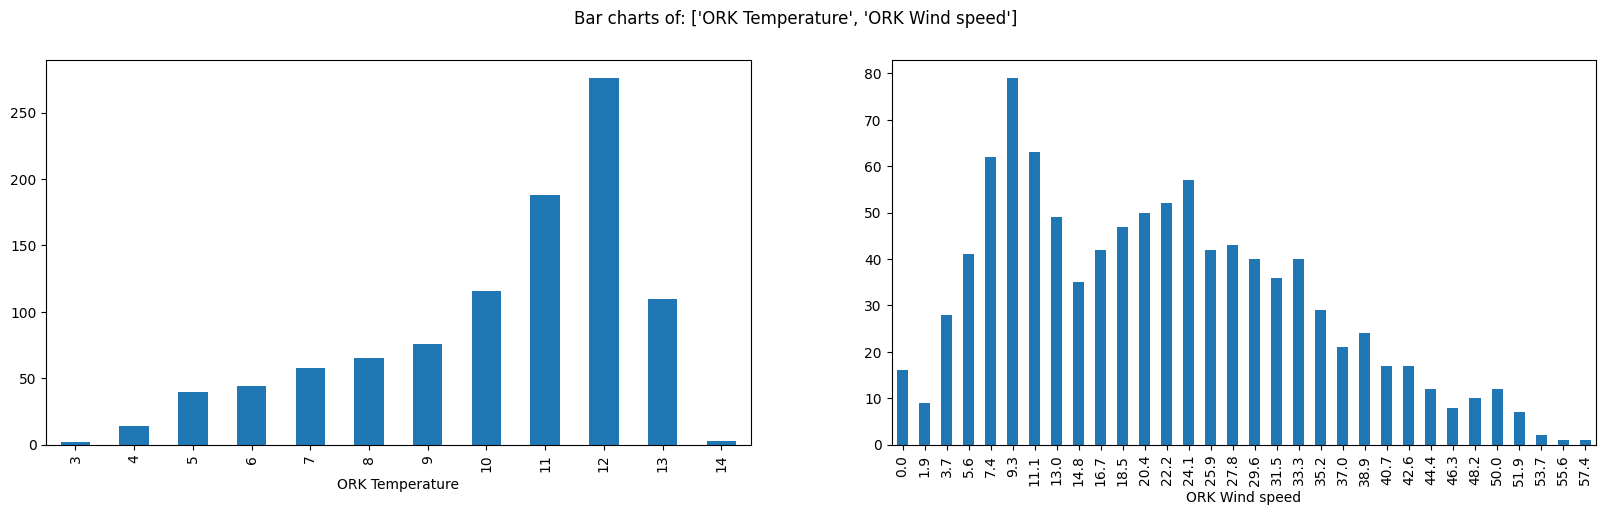

In [ ]:
#####################################################################
# Calling the function PlotBarCharts() we have created
PlotBarCharts(inpData=Electricity, colsToPlot=['ORK Temperature','ORK Wind speed'])

## Step 7: Now Visualize distribution of all the Continuous Predictor variables in the data using histograms
* Based on the Basic Exploratory Data Analysis, there are eleven continuous predictor variables 'CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', and 'LSTAT'.

array([[<Axes: title={'center': 'Week Of Year'}>,
        <Axes: title={'center': 'Day'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Period Of Day'}>],
       [<Axes: title={'center': 'Forecast Wind Production'}>,
        <Axes: title={'center': 'System Load EA'}>,
        <Axes: title={'center': 'SMPEA'}>,
        <Axes: title={'center': 'ORK Temperature'}>],
       [<Axes: title={'center': 'ORK Wind speed'}>,
        <Axes: title={'center': 'CO2 Intensity'}>,
        <Axes: title={'center': 'Actual Wind Production'}>,
        <Axes: title={'center': 'System Load EP2'}>],
       [<Axes: title={'center': 'SMPEP2'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

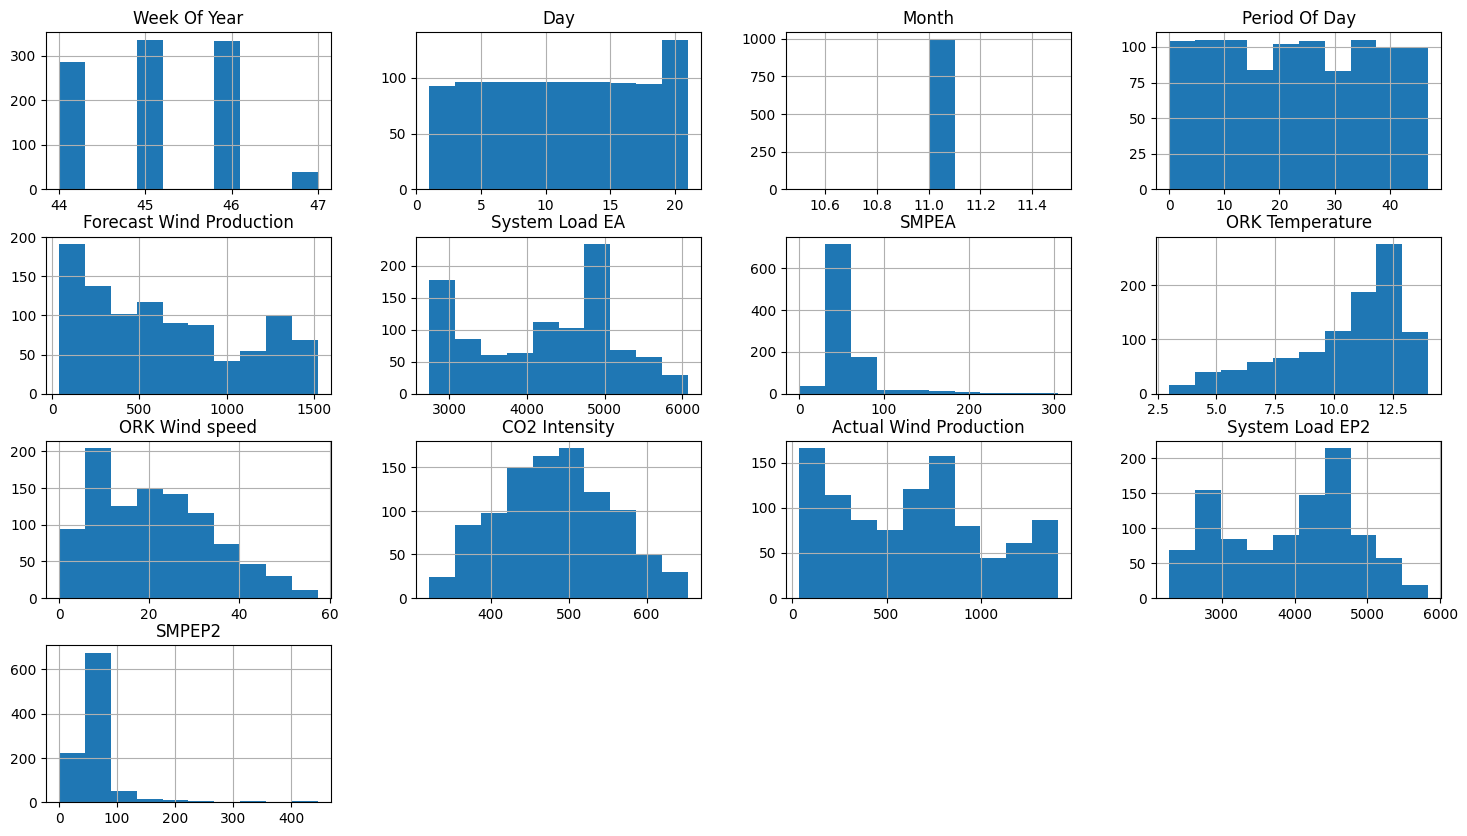

In [ ]:
# Plotting histograms of multiple columns together
Electricity.hist(['Week Of Year', 'Day', 'Month', 'Period Of Day', 'Forecast Wind Production', 'System Load EA', 'SMPEA', 'ORK Temperature',
                 'ORK Wind speed', 'CO2 Intensity', 'Actual Wind Production', 'System Load EP2', 'SMPEP2'], figsize=(18,10))

## Step 8: Outlier Analysis
* Outliers are extreme values in the data which are far away from most of the values.
* You can see them as the tails in the histogram.

* Outlier must be treated one column/data attribute at a time.
* As the treatment will be slightly different for each column
* Why I should analyse the outliers?
* Outliers bias the building of machine learning models.
* As the algorithm tries to fit the extreme value, it goes away from majority of the data.
* Outlined below are two options to treat outliers in the data.

* Option-1: Delete the outlier Records. Only if there are just few rows lost.
* Option-2: Impute the outlier values with a logical business value
* Let us find out out the most logical value to be replaced in place of outliers by looking at the histogram.


In [ ]:
#Replacing outliers for 'Actual Wind Production'
# Finding nearest values to 1300 mark
Electricity['CO2 Intensity'][Electricity['CO2 Intensity']<700].sort_values(ascending=False)

,CO2 Intensity
155,653.02
765,651.01
192,650.98
204,649.35
153,648.38
...,...
480,335.80
591,329.52
96,327.85
95,321.07


In [ ]:
# Replacing outliers with nearest possibe value
Electricity['CO2 Intensity'][Electricity['CO2 Intensity']>1300] =653.02

## Step 9:Visualising Data Distribution after outlier removal


array([[<Axes: title={'center': 'CO2 Intensity'}>]], dtype=object)

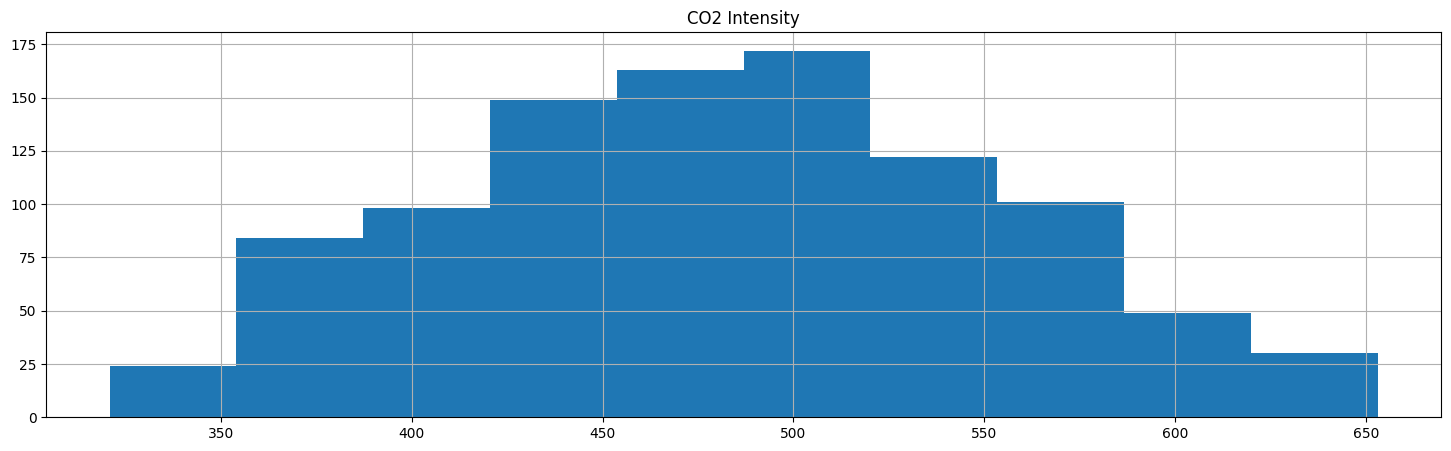

In [ ]:
Electricity.hist(['CO2 Intensity'], figsize=(18,5))

## Step 10: Missing Values Analysis

* Missing values are treated for each column separately.
* If a column has more than 30% data missing, then missing value treatment cannot be done.
* That column must be rejected because too much information is missing.
* Outlined below are some options for treating missing values in data.
* Delete the missing value rows if there are only few records
* Impute the missing values with MEDIAN value for continuous variables
* Impute the missing values with MODE value for categorical variables
* Interpolate the values based on nearby values
* Interpolate the values based on business logic

In [ ]:
# Finding how many missing values are there for each column
Electricity.isnull().sum()

,0
Week Of Year,0
Day,0
Month,0
Period Of Day,0
Forecast Wind Production,0
System Load EA,0
SMPEA,0
ORK Temperature,0
ORK Wind speed,0
CO2 Intensity,0


## Step 11: Feature Selection (Attribute Selection)

* Now its time to finally choose the best columns(Features) which are correlated to the Target variable.
* This can be done directly by measuring the correlation values or ANOVA analysis or Chi-Square tests.
* However, it is always helpful to visualize the relation between the Target variable/class variable and each of the predictors(features) to get a better sense of data.

* Listed below are some of the techniques used for visualizing relationship between two variables as well as measuring the strength statistically.

* **Visual exploration of relationship between variables**
* Continuous Vs Continuous ---- Scatter Plot
* Categorical Vs Continuous---- Box Plot
* Categorical Vs Categorical---- Grouped Bar Plots
* Statistical measurement of relationship strength between variables
* Continuous Vs Continuous ---- Correlation matrix
* Categorical Vs Continuous---- ANOVA test
* Categorical Vs Categorical--- Chi-Square test

* **For this dataset, the Target variable is Continuous, hence following two scenarios will need attention**

* Continuous Target Variable Vs Continuous Predictor
* Continuous Target Variable Vs Categorical Predictor


## Relationship exploration: Continuous Vs Continuous -- Scatter Charts
* When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using a metric called pearson's correlation value.

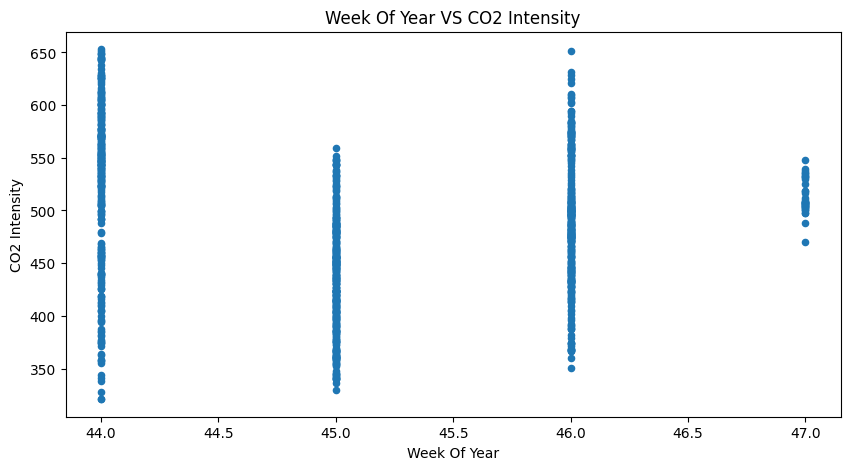

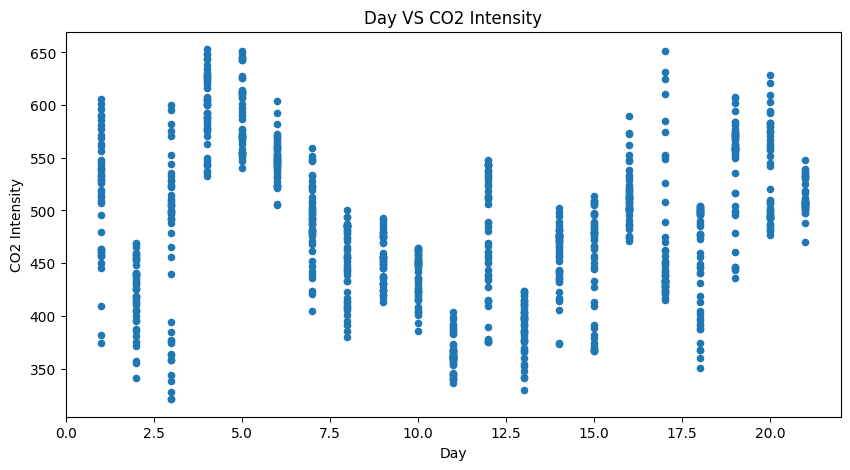

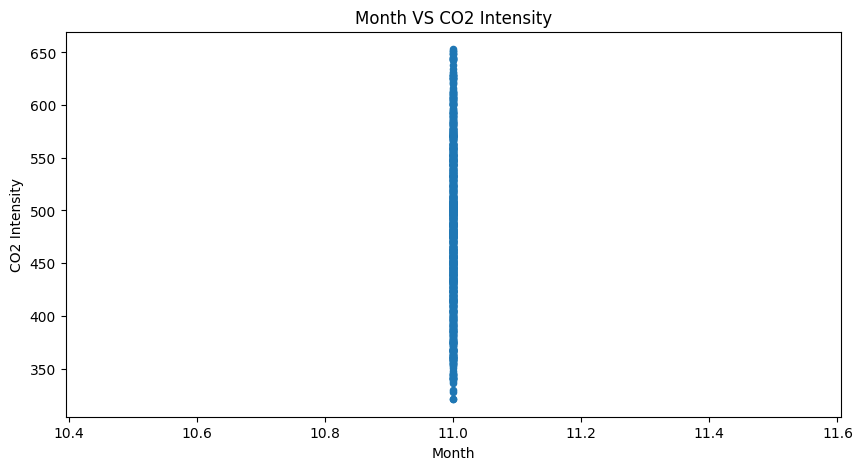

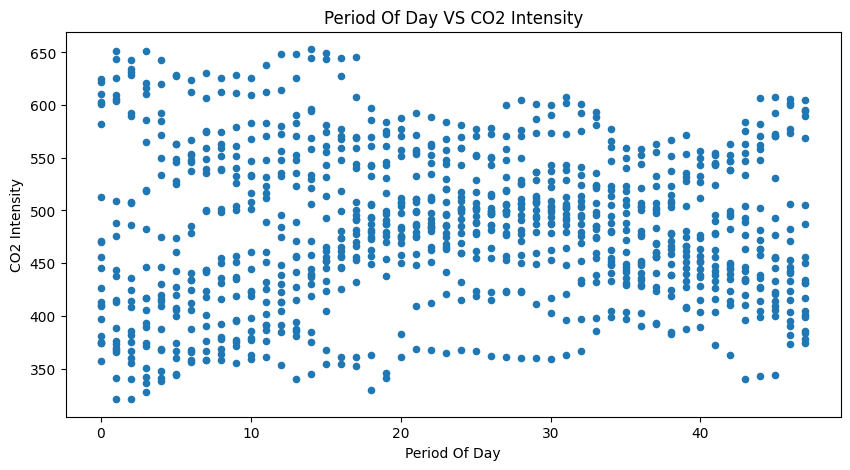

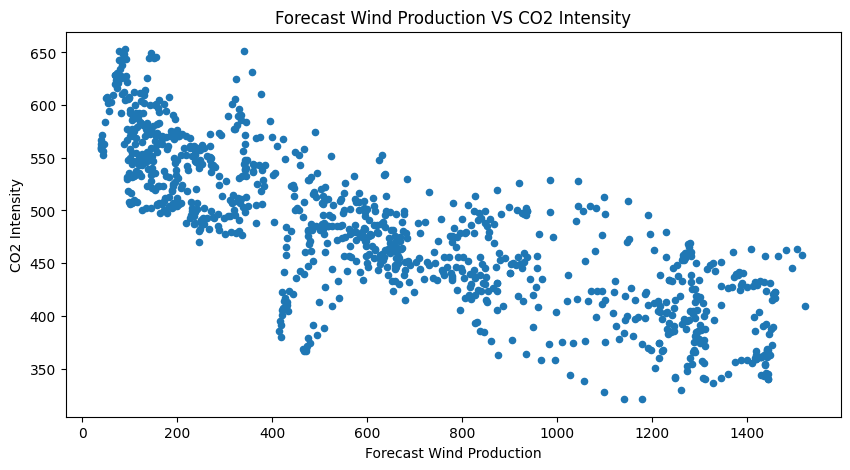

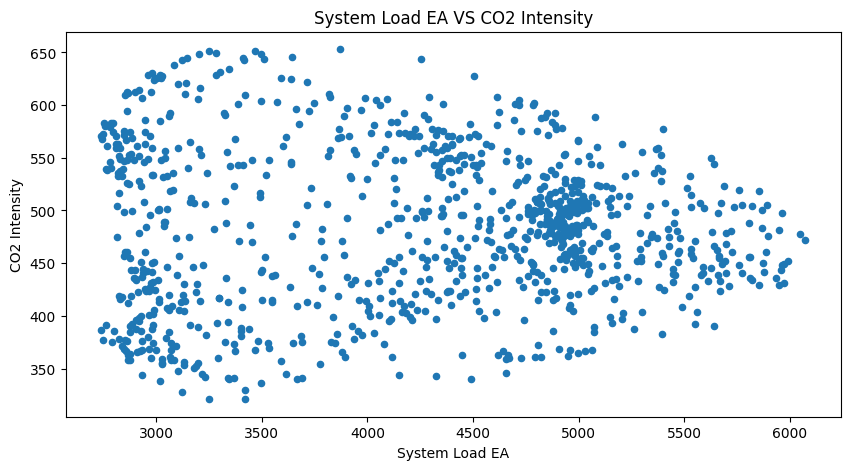

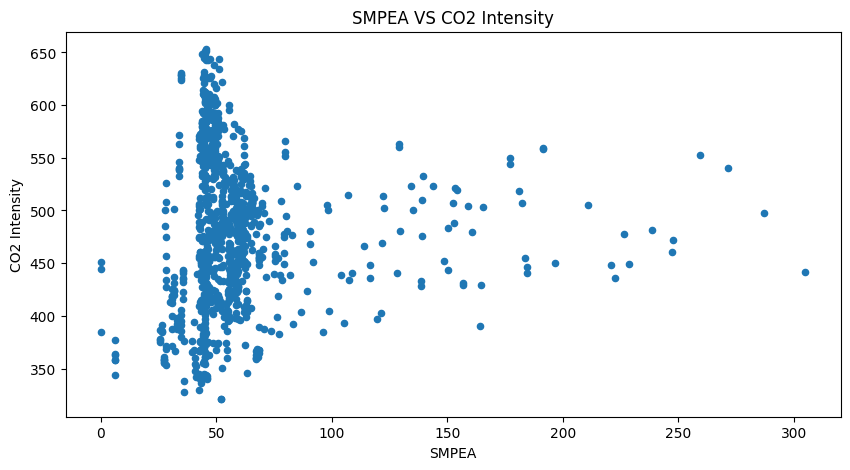

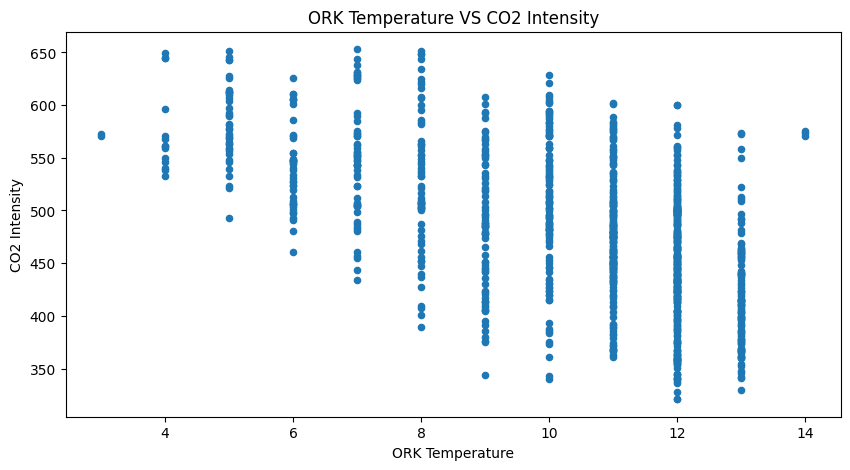

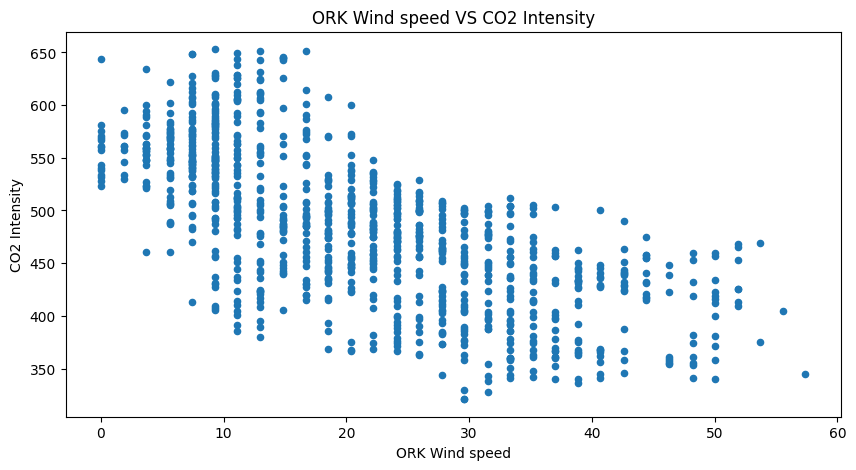

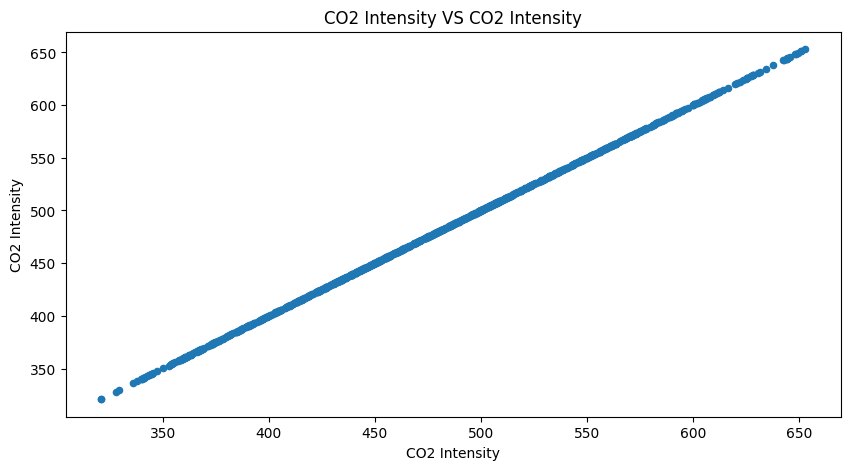

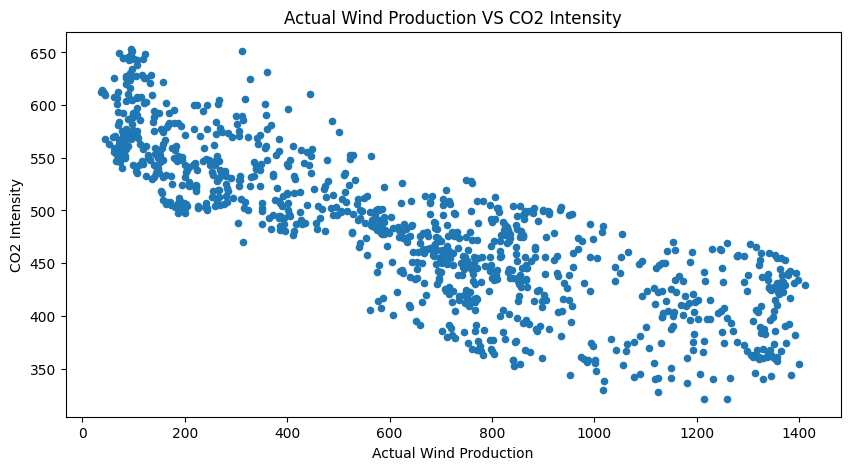

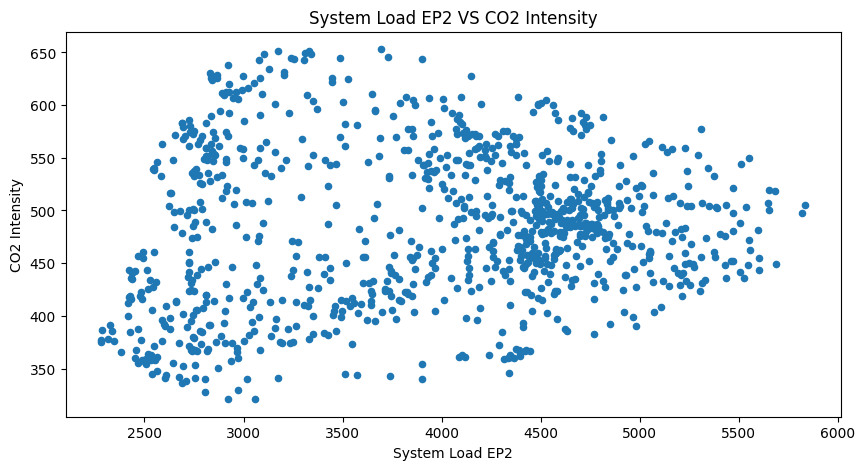

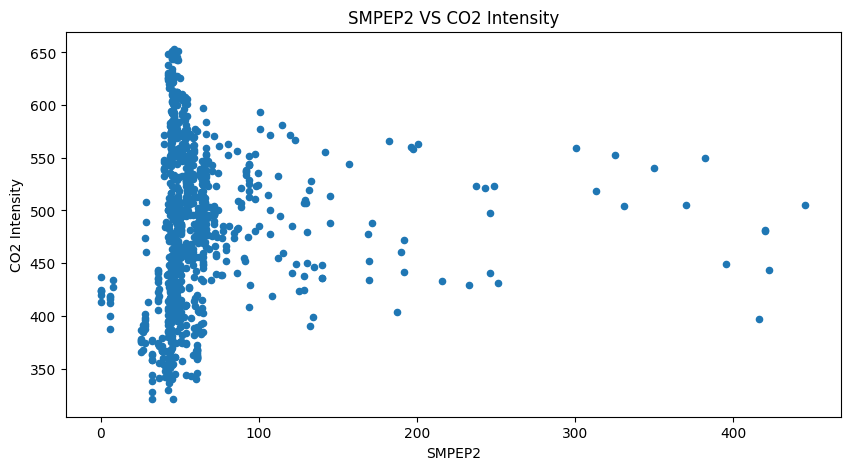

In [ ]:
ContinuousCols=['Week Of Year', 'Day', 'Month', 'Period Of Day', 'Forecast Wind Production', 'System Load EA', 'SMPEA', 'ORK Temperature',
                 'ORK Wind speed', 'CO2 Intensity', 'Actual Wind Production', 'System Load EP2', 'SMPEP2']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    Electricity.plot.scatter(x=predictor, y='CO2 Intensity', figsize=(10,5), title=predictor+" VS "+ 'CO2 Intensity')

## Scatter charts interpretation
* What should you look for in these scatter charts?

* **Trend.** You should try to see if there is a visible trend or not. There could be three scenarios

* **Increasing Trend**: This means both variables are positively correlated. In simpler terms, they are directly proportional to each other, if one value increases, other also increases. This is good for ML model building!

* **Decreasing Trend:** This means both variables are negatively correlated. In simpler terms, they are inversely proportional to each other, if one value increases, other decreases. This is also good for ML model building!

* **No Trend**: You cannot see any clear increasing or decreasing trend. This means there is no correlation between the variables. Hence that predictor/feature may not be the best one for ML model building.

* Based on this chart we can get a good idea about the predictor, if it will be useful or not. You confirm this by looking at the correlation value in the next step.

## Step 12: Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

* Pearson's correlation coefficient is a powerful metric for doing this.
* It can simply be calculated as the covariance between two features  x and  y
  (numerator) divided by the product of their standard deviations (denominator):

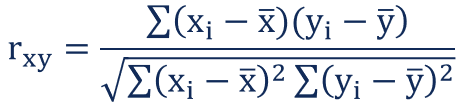

* This value can be calculated only between two numeric columns
Correlation between [-1,0) means inversely proportional, the scatter plot will show a downward trend
* Correlation between (0,1] means directly proportional, the scatter plot will show a upward trend
* Correlation near {0} means No relationship, the scatter plot will show no clear trend.
* If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship the sign does not matter
* We observe the correlations between Target variable and all other predictor variables(s) to check which columns/features/predictors are actually related to the target variable in question.

In [ ]:
# Calculating correlation matrix
ContinuousCols=['Week Of Year', 'Day', 'Month', 'Period Of Day', 'Forecast Wind Production', 'System Load EA', 'SMPEA', 'ORK Temperature',
                 'ORK Wind speed', 'CO2 Intensity', 'Actual Wind Production', 'System Load EP2', 'SMPEP2']

# Creating the correlation matrix
CorrelationData=Electricity[ContinuousCols].corr()
CorrelationData

,Week Of Year,Day,Month,Period Of Day,Forecast Wind Production,System Load EA,SMPEA,ORK Temperature,ORK Wind speed,CO2 Intensity,Actual Wind Production,System Load EP2,SMPEP2
Week Of Year,1.000000,0.946012,NaN,-0.027190,-0.030422,0.021659,0.059571,0.232696,0.041555,-0.121584,0.042506,0.058512,0.013447
Day,0.946012,1.000000,NaN,-0.022272,-0.038885,-0.046538,0.042943,0.245286,-0.002079,-0.071882,-0.006327,-0.003263,0.010332
Month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Period Of Day,-0.027190,-0.022272,NaN,1.000000,0.052461,0.715252,0.368882,0.130573,0.082681,0.015982,0.107326,0.685133,0.302856
Forecast Wind Production,-0.030422,-0.038885,NaN,0.052461,1.000000,0.092501,-0.014997,0.649038,0.845090,-0.804116,0.937705,-0.060014,-0.090068
System Load EA,0.021659,-0.046538,NaN,0.715252,0.092501,1.000000,0.584569,0.231762,0.200569,-0.007913,0.176475,0.973845,0.474345
SMPEA,0.059571,0.042943,NaN,0.368882,-0.014997,0.584569,1.000000,0.050752,0.034020,0.011873,0.034839,0.581804,0.728712
ORK Temperature,0.232696,0.245286,NaN,0.130573,0.649038,0.231762,0.050752,1.000000,0.636451,-0.576123,0.639835,0.113144,-0.007511
ORK Wind speed,0.041555,-0.002079,NaN,0.082681,0.845090,0.200569,0.034020,0.636451,1.000000,-0.683954,0.815885,0.070092,-0.048839
CO2 Intensity,-0.121584,-0.071882,NaN,0.015982,-0.804116,-0.007913,0.011873,-0.576123,-0.683954,1.000000,-0.831601,0.126517,0.074647


In [ ]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['ORK Wind speed'][abs(CorrelationData['ORK Wind speed']) > 0.5 ]

,ORK Wind speed
Forecast Wind Production,0.845090
ORK Temperature,0.636451
ORK Wind speed,1.000000
CO2 Intensity,-0.683954
Actual Wind Production,0.815885


# Step 13:  Relationship exploration: Categorical Vs Continuous -- Box Plots
* When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots,  and
* Measure the strength of relation using Anova test.

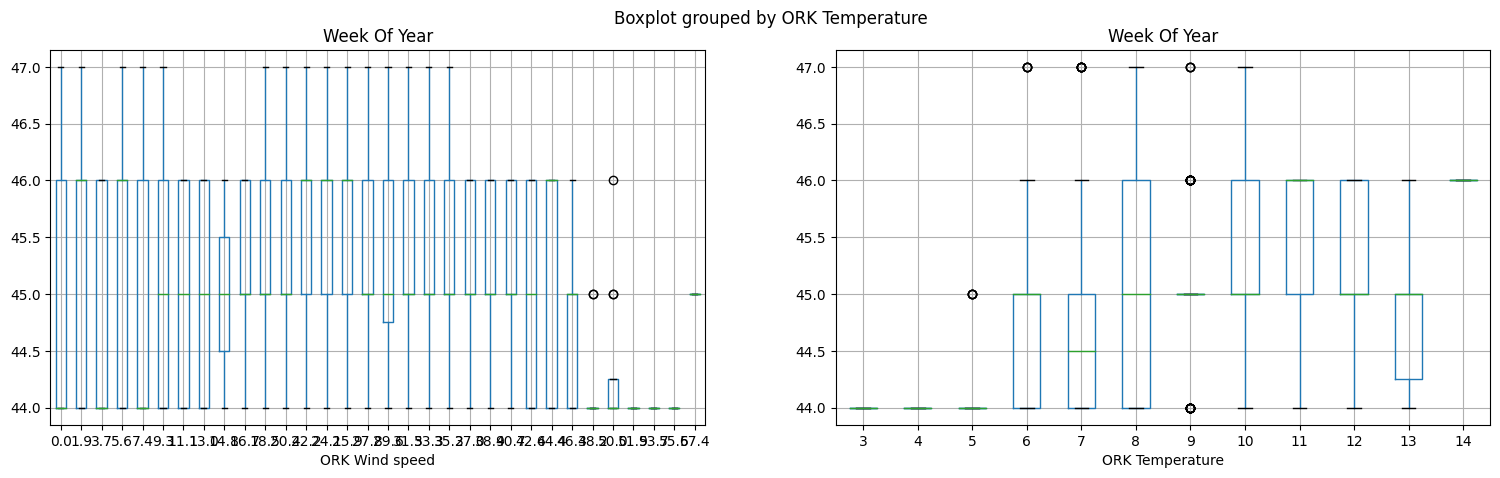

In [ ]:
# Box plots for continuous Target Variable "Week Of Year" and Categorical predictors
CategoricalColsList=['ORK Wind speed', 'ORK Temperature']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Week Of Year"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    Electricity.boxplot(column='Week Of Year', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

## Step 14: Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

* Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

* Assumption(H0) Null Hypothesis: There is NO relation between the given variables (i.e.
* The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
* ANOVA Test result: Probability of H0 (Null Hypothesis being true

In [ ]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])

    return(SelectedPredictors)

In [ ]:
#Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['ORK Wind speed', 'ORK Temperature']
FunctionAnova(inpData=Electricity,
              TargetVariable='Week Of Year',
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

ORK Wind speed is correlated with Week Of Year | P-Value: 2.260163215339074e-10
ORK Temperature is correlated with Week Of Year | P-Value: 3.986472647742522e-27


['ORK Wind speed', 'ORK Temperature']

## Selecting final Predictors/Features for building Machine Learning/AI model.
* Based on the extensive tests with exploratory data analysis, we can select the final features/predictors/columns for machine learning model building as 'System Load EA', 'SMPEA','ORK Temperature', 'ORK Wind speed', 'CO2 Intensity'

In [ ]:
SelectedColumns=['System Load EA', 'SMPEA','ORK Temperature', 'ORK Wind speed', 'CO2 Intensity']

# Selecting final columns
DataForML=Electricity[SelectedColumns]
DataForML.head()

,System Load EA,SMPEA,ORK Temperature,ORK Wind speed,CO2 Intensity
0,3388.77,49.26,6,9.3,600.71
1,3196.66,49.26,6,11.1,605.42
2,3060.71,49.10,5,11.1,589.97
3,2945.56,48.04,6,9.3,585.94
4,2849.34,33.75,6,11.1,571.52


In [ ]:
# Saving this final data subset for reference during deployment
DataForML.to_pickle('DataForML.pkl')

## Step 15: Data Pre-processing for Machine Learning Model Building or Model Development
* List of steps that needs to be performed on predictor variables before data can be used for machine learning

* Converting each Ordinal Categorical columns to numeric
* Converting Binary nominal Categorical columns to numeric using 1/0 mapping
* Converting all other nominal categorical columns to numeric using pd.get_dummies()
* Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks
* Converting the ordinal variable to numeric - In this data there is no Ordinal categorical variable.
* Converting the binary nominal variable to numeric using 1/0 mapping: There is no binary nominal variable in string format in this data


## Converting the nominal variable to numeric using get_dummies()

In [ ]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['CO2 Intensity']=Electricity['CO2 Intensity']

# Printing sample rows
DataForML_Numeric.head()

,System Load EA,SMPEA,ORK Temperature,ORK Wind speed,CO2 Intensity
0,3388.77,49.26,6,9.3,600.71
1,3196.66,49.26,6,11.1,605.42
2,3060.71,49.10,5,11.1,589.97
3,2945.56,48.04,6,9.3,585.94
4,2849.34,33.75,6,11.1,571.52


## Step 16: Machine Learning Model Development:
* Splitting the data into Training and Testing sample
* We dont use the full data for creating the model (training data).
* Some data is randomly selected and kept aside for checking how good the model is.
* This is known as Testing Data and the remaining data is called Training data on which the model is built.
* Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [ ]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['System Load EA', 'SMPEA', 'ORK Temperature', 'ORK Wind speed',
       'CO2 Intensity'],
      dtype='object')

In [ ]:
#Separate Target Variable and Predictor Variables
TargetVariable='CO2 Intensity'
Predictors=['System Load EA', 'SMPEA','ORK Temperature', 'ORK Wind speed']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

## Step 17: Standardization/Normalization of data
* You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data (Optional Step)

* However, if you are using KNN or Neural Networks, then this step becomes necessary.

In [ ]:
### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(694, 4)
(694,)
(298, 4)
(298,)


## Step 18: Multiple Linear Regression Algorithm For ML/AI model building

In [ ]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['CO2 Intensity']-TestingDataResults['PredictedCO2 Intensity']))/TestingDataResults['CO2 Intensity'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.5469348390369801

##### Model Validation and Accuracy Calculations ##########
   System Load EA     SMPEA  ORK Temperature  ORK Wind speed  CO2 Intensity  \
0        0.522841  0.158219         0.545455        0.322300         569.45   
1        0.413174  0.181070         0.545455        0.226481         423.34   
2        0.697466  0.224477         0.909091        0.677700         367.61   
3        0.676215  0.194545         0.636364        0.290941         501.70   
4        0.600759  0.181988         0.818182        0.580139         396.23   

   PredictedCO2 Intensity  
0                   509.0  
1                   520.0  
2                   413.0  
3                   514.0  
4                   437.0  
Mean Accuracy on test data: 91.2771174592528
Median Accuracy on test data: 93.0965452595123

Accuracy values for 10-fold Cross Validation:
 [89.80114774 89.8475316  93.92871848 86.07956385 90.97436062 86.92875215
 91.23319902 92.97516568 92.3637616

# Decision Tree Regressor

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)
R2 Value: 0.755659832220514

##### Model Validation and Accuracy Calculations ##########
   System Load EA     SMPEA  ORK Temperature  ORK Wind speed  CO2 Intensity  \
0        0.522841  0.158219         0.545455        0.322300         569.45   
1        0.413174  0.181070         0.545455        0.226481         423.34   
2        0.697466  0.224477         0.909091        0.677700         367.61   
3        0.676215  0.194545         0.636364        0.290941         501.70   
4        0.600759  0.181988         0.818182        0.580139         396.23   

   PredictedCO2 Intensity  
0                   497.0  
1                   484.0  
2                   409.0  
3                   484.0  
4                   460.0  
Mean Accuracy on test data: 93.22350457559702
Median Accuracy on test data: 95.23009454583556

Accuracy values for 10-fold Cross Validation:
 [88.94549398 89.86261926 90.41269959 85.83375791 89.23798651 87.8

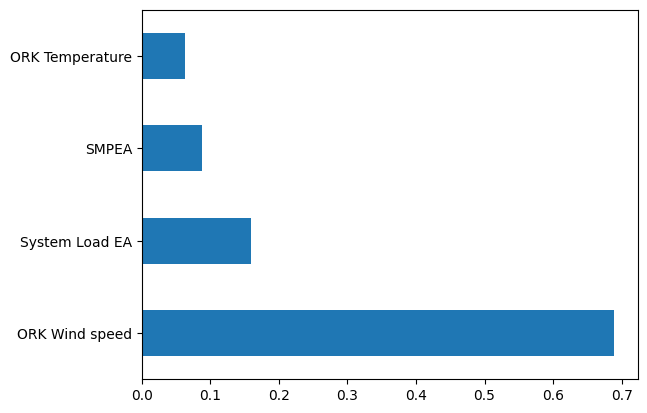

In [ ]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=5,criterion='friedman_mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['CO2 Intensity']-TestingDataResults['PredictedCO2 Intensity']))/TestingDataResults['CO2 Intensity'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlierB
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

In [ ]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# choose from different tunable hyper parameters
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:49:55] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:49:56] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [11:49:57] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)



Accuracy values for 10-fold Cross Validation:
 [90.83724107 89.61086007 92.47439409 85.41335006 89.56621786 86.14631486
 90.41403347 91.59759893 92.32849198 92.43777055]

Final Average Accuracy of the model: 90.08


# Step 22: Retraining the final model using 100% data

In [ ]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

# Step 23: Save the model as a serialized file which can be stored anywhere

In [ ]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content


In [ ]:
!pip install flask

In [ ]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd
import numpy

In [ ]:
app = Flask(__name__)

@app.route('/prediction_api', methods=["GET"])
def prediction_api():
    try:
        # Getting the paramters from API call
        LSTAT_value = float(request.args.get('LSTAT'))
        RM_value=float(request.args.get('RM'))
        PTRATIO_value=float(request.args.get('PTRATIO'))

        # Calling the funtion to get predictions
        prediction_from_api=FunctionGeneratePrediction(
                                                       inp_LSTAT=LSTAT_value,
                                                       inp_RM=RM_value,
                                                       inp_PTRATIO=PTRATIO_value
                                                )

        return (prediction_from_api)

    except Exception as e:
        return('Something is not right!:'+str(e))

# Starting the API engine

In [ ]:
import os
if __name__ =="__main__":

    # Hosting the API in localhost
    app.run(host='127.0.0.1', port=9000, threaded=True, debug=True, use_reloader=False)
    # Interrupt kernel to stop the API

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:9000
INFO:werkzeug:Press CTRL+C to quit


In [ ]:
'''
Sample URL to call the API
Copy and paste below URL in the web browser
http://127.0.0.1:9000/prediction_api?LSTAT=4.9&RM=6.5&PTRATIO=15.3
'''

# Desktop App deployment: Tkinter package
* Will not work on Google Colab.
* Need to use PyCharm to run this code.
* Make sure you include the data file (Electricity.csv)

In [ ]:
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

class ElectricityPricePredictionApp:
    def __init__(self, master):
        self.master = master
        self.master.title('Electricity Price Prediction')
        self.data = pd.read_csv('Electricity.csv')
        self.sliders = []

        self.X = self.data.drop('CO2 Intensity', axis=1).values
        self.y = self.data['CO2 Intensity'].values

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

        self.model = XGBRegressor()
        self.model.fit(self.X_train, self.y_train)

        self.create_widgets()

    def create_widgets(self):
        for i, column in enumerate(self.data.columns[:-1]):
            label = tk.Label(self.master, text=column + ': ')
            label.grid(row=i, column=0)
            current_val_label = tk.Label(self.master, text='0.0')
            current_val_label.grid(row=i, column=2)
            slider = ttk.Scale(self.master, from_=self.data[column].min(), to=self.data[column].max(), orient="horizontal",
                               command=lambda val, label=current_val_label: label.config(text=f'{float(val):.2f}'))
            slider.grid(row=i, column=1)
            self.sliders.append((slider, current_val_label))

        predict_button = tk.Button(self.master, text='Predict Price', command=self.predict_price)
        predict_button.grid(row=len(self.data.columns[:-1]), columnspan=3)

    def predict_price(self):
        inputs = [float(slider.get()) for slider, _ in self.sliders]
        price = self.model.predict([inputs])
        messagebox.showinfo('Predicted Price', f'The predicted Electricity price is ${price[0]:.2f}')

if __name__ == '__main__':
    root = tk.Tk()
    app = ElectricityPricePredictionApp(root)
    root.mainloop()


# END OF PROGRAMMING PROJECT